In [3]:
import seaborn
import matplotlib
import pandas as pd
import numpy as np
import json

In [4]:
wr=pd.read_csv("/Users/antoniomendoza/Desktop/Mineria/winemag-data_first150k.csv")

In [5]:
wr.shape

(150930, 11)

In [6]:
wr.head

<bound method NDFrame.head of         Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100% varietal wine hails from ...   
1                1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30% new French oak, an...   
4                4  France  This is the top wine from La Bégude, named aft...   
...            ...     ...                                                ...   
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...  

In [7]:
wr.columns #tenemos el país, descripcion, desginacion, puntos, precio , provincia, region1, region2, variedad,

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [9]:
wr.rename(columns={"Unnamed: 0":"Number"})

,Number,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [11]:
wr.dtypes #tenemos que la comuna renombrada como numero y los puntos son enteros, el precio es flotante, y los demas son tdos object

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [36]:
#En esta practica nos enfocaremos en el precio y puntaje del vino, por lo que eliminaremos las demas columnas
wr_nuevo=wr.drop(columns=["country","Unnamed: 0","description","province","region_1","region_2","variety","winery"],axis=1)


In [37]:
wr_nuevo["price"].mean()

33.13148249353299

In [38]:
wr_nuevo["points"].mean()

87.8884184721394

In [39]:
wr_nuevo.corr()#podemos observar la correlacion que existe entre el precio y los puntoswr

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [40]:
wr_nuevo.max()

points     100.0
price     2300.0
dtype: float64

In [41]:
wr_nuevo

,designation,points,price
0,Martha's Vineyard,96,235.0
1,Carodorum Selección Especial Reserva,96,110.0
2,Special Selected Late Harvest,96,90.0
3,Reserve,96,65.0
4,La Brûlade,95,66.0
...,...,...,...
150925,NaN,91,20.0
150926,Cuvée Prestige,91,27.0
150927,Terre di Dora,91,20.0
150928,Grand Brut Rosé,90,52.0


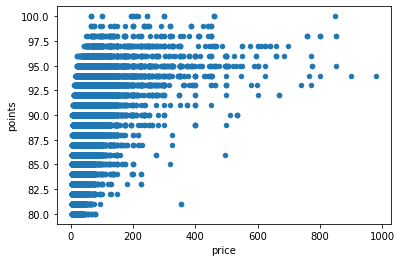

In [55]:
wr_nuevo[wr_nuevo["price"]<1000].plot.scatter(x="price", y="points")# aqui vemos como se dispersan los datos y vemos que en relacion de precio y puntos, que la mayoría de los vinos independientemente de su ountuacion se encuenran en un rango de precios de 0 a 200

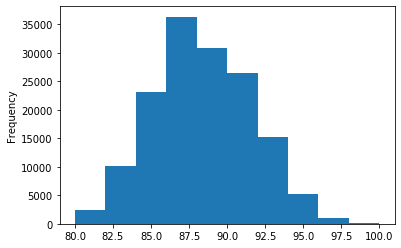

In [45]:
wr_nuevo["points"].plot.hist() #aqui podemos observar que la mayoria de datos se encuentra aproximadamente entre 86 y 88 puntos